In [ ]:
from etabstopython import EtabsModel


### UNITS

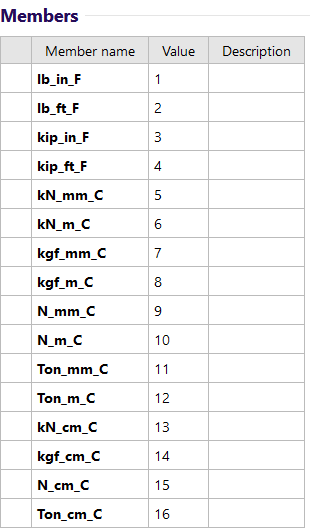

In [ ]:
units = 12
# Model
model = EtabsModel(units=units , name='PRY TEST001 POST PUCE')
# Summary
model.summary()

✅ Connected to ETABS.
📏 Units set to 12.
✅ Loaded Story Definitions: 26 stories.
📐 Computed accumulated floor heights: [  0.    4.7   8.4  12.1  15.8  19.5  23.2  26.9  30.6  34.3  38.   41.7
  45.4  51.9  55.6  59.3  63.   66.7  70.4  74.1  77.8  81.5  85.2  88.9
  92.6  96.3 100. ]
✅ Loaded Point Object Connectivity: 1055 connections.
✅ Loaded Frame Section Property Definitions: 8 properties.
✅ Loaded Frame Section Property Definitions - Concrete Rectangular: 8 properties.
✅ Loaded Frame Assignments - Section Properties: 1052 properties.
✅ Loaded Beam Object Connectivity: 744 entries.
✅ Loaded Column Object Connectivity: 232 entries.
✅ Loaded Brace Object Connectivity: 76 entries.
✅ Combined linear elements: 1052 total.
✅ Loaded Wall Object Connectivity: 156 entries.
✅ Loaded Floor Object Connectivity: 52 entries.
✅ Processed floor point groups by story: 25 levels.
📐 Assigned dimensions to 8 frame sections.
✅ Assigned colors to 5 frame sections.
✅ Loaded Element Forces - Columns: 619

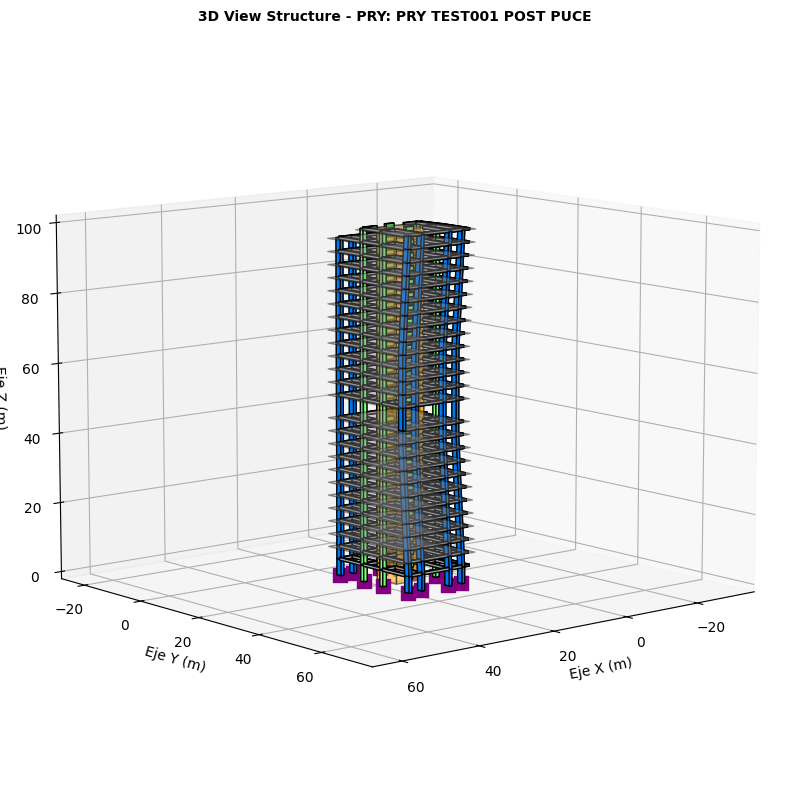

In [7]:
from etabstopython.plotter import plot_structure_3d
plot_structure_3d(model)

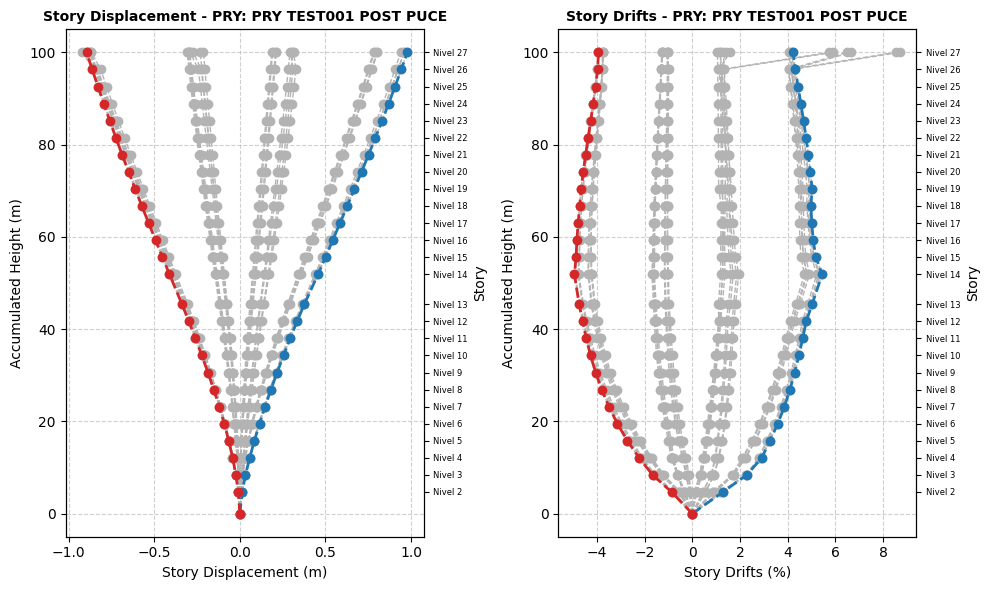

In [4]:
from etabstopython.tools import derivas_combos
from etabstopython.plotter import graph_disp_drifts_combos
import matplotlib.pyplot as plt

Cd = 5.5
Ie = 1.25
R = 1.0
color_eq = [0.7, 0.7, 0.7]

combos_comp=['1.2D+1.0E+1.0L+0.2S (1X)' , '1.2D+1.0E+1.0L+0.2S (2X)'    , '1.2D+1.0E+1.0L+0.2S (3X)'     , '1.2D+1.0E+1.0L+0.2S (4X)', 
             '0.9D+1.0E (1X)'           , '0.9D+1.0E (2X)'              , '0.9D+1.0E (3X)'               , '0.9D+1.0E (4X)', 
             '1.2D+1.0E+1.0L+0.2S (1Y)' , '1.2D+1.0E+1.0L+0.2S (2Y)'    , '1.2D+1.0E+1.0L+0.2S (3Y)'     , '1.2D+1.0E+1.0L+0.2S (4Y)', 
             '0.9D+1.0E (1Y)'           , '0.9D+1.0E (2Y)'              , '0.9D+1.0E (3Y)'               , '0.9D+1.0E (4Y)' , ]

# Crear figura y ejes (y ejes secundarios)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()

# Graficar cada combinación
for combo in combos_comp:
    dx, dy, drift_x, drift_y = derivas_combos(model, combo, Cd, Ie, R)
    graph_disp_drifts_combos(model, dx, dy, drift_x, drift_y,
                             ax1, ax2, ax1_twin, ax2_twin,
                             color_x=color_eq, color_y=color_eq, line_width=1.0)

# Graficar envolvente
dx, dy, drift_x, drift_y = derivas_combos(model, 'Envolvente-AEE', Cd, Ie, R)
graph_disp_drifts_combos(model, dx, dy, drift_x, drift_y,
                         ax1, ax2, ax1_twin, ax2_twin,
                         color_x='tab:blue', color_y='tab:red', line_width=2.0)

plt.tight_layout()
plt.show()


In [3]:
from openquake.calculators.base import CalcConfig
CalcConfig.VALID_KEYS


ImportError: cannot import name 'CalcConfig' from 'openquake.calculators.base' (c:\Users\ppala\AppData\Local\Programs\Python\Python310\lib\site-packages\openquake\calculators\base.py)